In [ ]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,sentence,1category,2category,sentiment
0,4754,При этом всегда получал качественные услуги.,Communication,NaN,+
1,4417,"Не вижу, за что хотя бы 2 поставить, сервис на 1!",?,NaN,−
2,3629,"Вот так ""Мой любимый"" банк МКБ меня обманул.",?,NaN,−
3,11640,Отвратительное отношение к клиентам.,Communication,NaN,−
4,5571,"Всегда в любое время дня и ночи помогут, ответ...",Communication,NaN,+


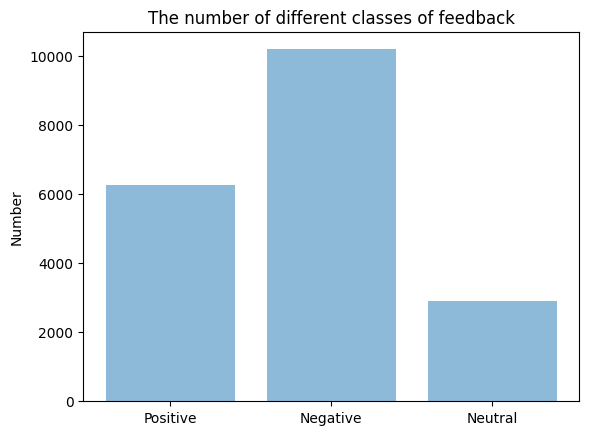

In [ ]:
sentiment_list = df['sentiment'].tolist()
plus = 0
minus = 0
question = 0
for element in sentiment_list:
  if element == '−':
    minus += 1
  elif element == '+':
    plus += 1
  else:
    question += 1

plus_pers = plus/len(sentiment_list)
minus_pers = minus/len(sentiment_list)
question_pers = question/len(sentiment_list)

import matplotlib.pyplot as plt
import numpy as np 
import matplotlib.pyplot as plt 
names = ('Positive', 'Negative', 'Neutral') 
y_pos = np.arange(len(names)) 
data = [plus, minus, question] 
plt.bar(y_pos, data, align='center', alpha=0.5) 
plt.xticks(y_pos, names) 
plt.ylabel('Number') 
plt.title('The number of different classes of feedback') 
plt.show()

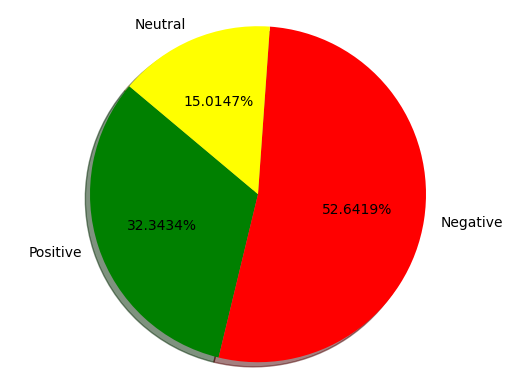

In [ ]:
names = ['Positive', 'Negative', 'Neutral']
persentage = [plus_pers, minus_pers, question_pers] 
colors = ['green', 'red', 'yellow'] 
plt.pie(persentage, labels=names, colors=colors, autopct='%1.4f%%', shadow=True, startangle=140) 
plt.axis('equal') 
plt.show()

In [ ]:
russian_stopwords = []

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

def create_wordcloud():

  def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

  def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus

  def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=russian_stopwords,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                          ).generate(str_corpus(corpus))
    return wordCloud

  corpus = get_corpus(df['sentence'].values)
  procWordCloud = get_wordCloud(corpus)

  fig = plt.figure(figsize=(20, 8))
  plt.subplot(1, 2, 1)
  plt.imshow(procWordCloud)
  plt.axis('off')
  plt.subplot(1, 2, 1)

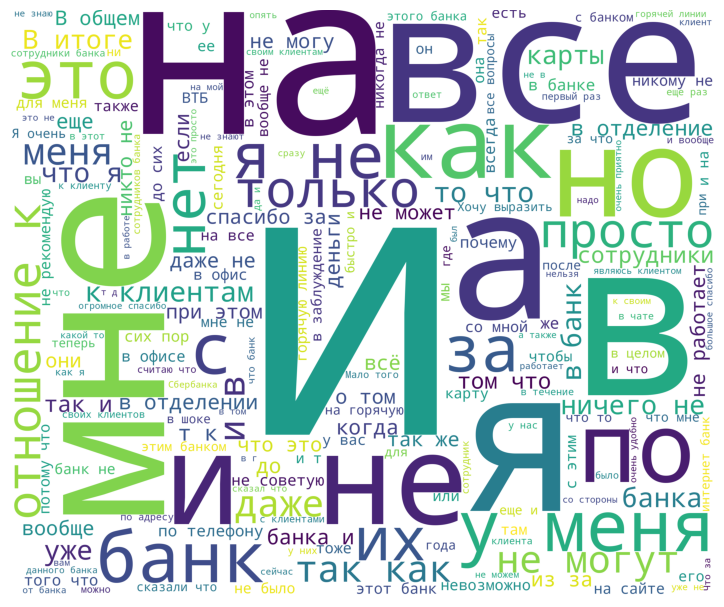

In [ ]:
create_wordcloud()

In [ ]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from string import punctuation
russian_stopwords = stopwords.words("russian")
russian_stopwords.append('это')
russian_stopwords += ['банка', 'банке', 'банков', 'банк']

def clean_df():
  def remove_punct(text):
      table = {33: ' ', 34: ' ', 35: ' ', 36: ' ', 37: ' ', 38: ' ', 39: ' ', 40: ' ', 41: ' ', 42: ' ', 43: ' ', 44: ' ', 45: ' ', 46: ' ', 47: ' ', 58: ' ', 59: ' ', 60: ' ', 61: ' ', 62: ' ', 63: ' ', 64: ' ', 91: ' ', 92: ' ', 93: ' ', 94: ' ', 95: ' ', 96: ' ', 123: ' ', 124: ' ', 125: ' ', 126: ' '}
      return text.translate(table)

  df['sentence'] = df['sentence'].map(lambda x: x.lower())
  df['sentence'] = df['sentence'].map(lambda x: remove_punct(x))
  df['sentence'] = df['sentence'].map(lambda x: x.split(' '))
  df['sentence'] = df['sentence'].map(lambda x: [token for token in x if token not in russian_stopwords\
                                                                    and token != " " \
                                                                    and token.strip() not in punctuation])
  df['sentence'] = df['sentence'].map(lambda x: ' '.join(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
original_df = df.drop(df.columns[[2, 3, 4]], axis = 1)
original_df.head()

,Unnamed: 0,sentence
0,4754,При этом всегда получал качественные услуги.
1,4417,"Не вижу, за что хотя бы 2 поставить, сервис на 1!"
2,3629,"Вот так ""Мой любимый"" банк МКБ меня обманул."
3,11640,Отвратительное отношение к клиентам.
4,5571,"Всегда в любое время дня и ночи помогут, ответ..."


In [ ]:
clean_df()

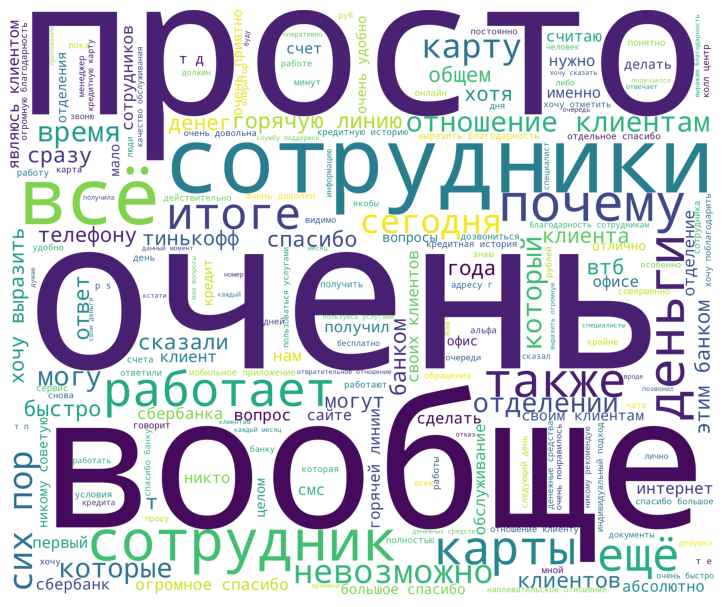

In [ ]:
create_wordcloud()

In [ ]:
df_sent = df.drop(df.columns[[0, 2, 3]], axis = 1)
df_cat = df.drop(df.columns[[0, 3, 4]], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_sent['sentence'], df_sent['sentiment'], test_size=0.2, random_state=42)
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(df_cat['sentence'], df_cat['1category'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train.head()

14953    посчастливилось пообщаться этим прекрасным чел...
10903    такого унизительного отношения клиентам ещё св...
8813                  сбербанк потерял закладную поэтому 5
13313             здравствуйте очень доволен обслуживанием
19183    впаривание карт сбербанке самое прекрасное жиз...
Name: sentence, dtype: object

In [ ]:
sent_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('sgd_clf', SGDClassifier(random_state=42))])

cat_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('sgd_clf', SGDClassifier(random_state=42))])

sent_clf.fit(X_train, y_train)
cat_clf.fit(X_train_cat, y_train_cat)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('sgd_clf', SGDClassifier(random_state=42))])

In [ ]:
y_pred = sent_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.8703847146914536

In [ ]:
y_pred_cat = cat_clf.predict(X_test_cat)

accuracy_score(y_test_cat, y_pred_cat)

0.5979860573199071

In [ ]:
# Уже расчитанные значения лучших параметров
parameters = { 
              'sgd_clf__loss':['modified_huber'],
              'sgd_clf__class_weight':[None],
              'sgd_clf__penalty':['l2'],
              'tfidf__strip_accents':[None],
               'tfidf__ngram_range':[(1,2)]
              }

model_sent = GridSearchCV(sent_clf, parameters, cv=4, n_jobs=-1).fit(X_train, y_train)
print('Best score and parameter combination:')
print(model_sent.best_score_, model_sent.best_params_)

Best score and parameter combination:
0.8644111570247933 {'sgd_clf__class_weight': None, 'sgd_clf__loss': 'modified_huber', 'sgd_clf__penalty': 'l2', 'tfidf__ngram_range': (1, 2), 'tfidf__strip_accents': None}


In [ ]:
# Уже расчитанные значения лучших параметров
parameters = { 
              'sgd_clf__loss':['log'],
              'sgd_clf__penalty':['elasticnet'],
               'tfidf__ngram_range':[(1,2)]
              }

model_cat = GridSearchCV(cat_clf, parameters, cv=4, n_jobs=-1).fit(X_train_cat, y_train_cat)
print('Best score and parameter combination:')
print(model_cat.best_score_, model_cat.best_params_)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Best score and parameter combination:
0.5604338842975206 {'sgd_clf__loss': 'log', 'sgd_clf__penalty': 'elasticnet', 'tfidf__ngram_range': (1, 2)}


In [ ]:
y_pred_sent = model_sent.predict(X_test)

accuracy_score(y_test, y_pred_sent)

0.8750322747224374

In [ ]:
model_sent.predict_proba(X_test)

array([[0.        , 0.01887938, 0.98112062],
       [0.02037065, 0.02286839, 0.95676096],
       [0.75973636, 0.17596041, 0.06430323],
       ...,
       [0.04184681, 0.02857112, 0.92958206],
       [0.04544642, 0.02609554, 0.92845804],
       [0.19879637, 0.71140297, 0.08980066]])

In [ ]:
y_pred_sent

array(['−', '−', '+', ..., '−', '−', '?'], dtype='<U1')

In [ ]:
predicted_list = []
for element in y_pred_sent:
  predicted_list.append(element)

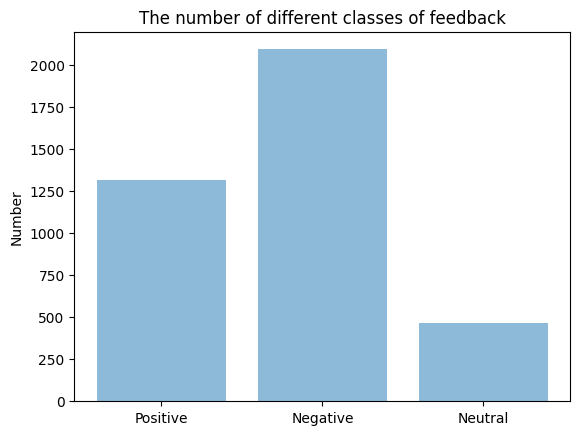

In [ ]:
plus = 0
minus = 0
question = 0
for element in predicted_list:
  if element == '−':
    minus += 1
  elif element == '+':
    plus += 1
  else:
    question += 1

plus_pers = plus/len(predicted_list)
minus_pers = minus/len(predicted_list)
question_pers = question/len(predicted_list)

import matplotlib.pyplot as plt
import numpy as np 
import matplotlib.pyplot as plt 
names = ('Positive', 'Negative', 'Neutral') 
y_pos = np.arange(len(names)) 
data = [plus, minus, question] 
plt.bar(y_pos, data, align='center', alpha=0.5) 
plt.xticks(y_pos, names) 
plt.ylabel('Number') 
plt.title('The number of different classes of feedback') 
plt.show()

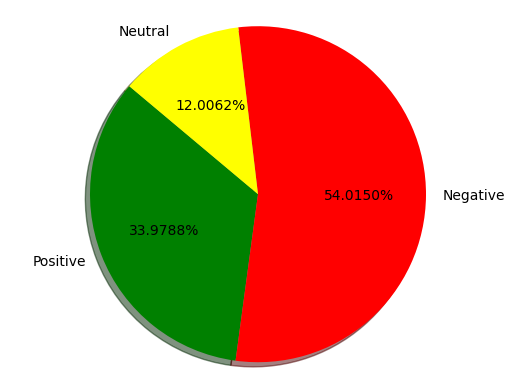

In [ ]:
names = ['Positive', 'Negative', 'Neutral']
persentage = [plus_pers, minus_pers, question_pers] 
colors = ['green', 'red', 'yellow'] 
plt.pie(persentage, labels=names, colors=colors, autopct='%1.4f%%', shadow=True, startangle=140) 
plt.axis('equal') 
plt.show()

In [ ]:
y_pred_cat = model_cat.predict(X_test_cat)

accuracy_score(y_test_cat, y_pred_cat)

0.571133488252001

In [ ]:

test_df = pd.read_csv('1sentencenenew.csv')
test_df.head()

,Unnamed: 0,texts
0,4036,15.03.2022 обратился на горячую линию для закр...
1,5804,"Уже который год в ТКБ не решается ""глобальная ..."
2,2752,Добрый день. Хочу оставить отзыв о пользовании...
3,1921,"Добрый день Сегодня, зайдя в свой личный кабин..."
4,7374,"Обслуживаюсь в Тинькофф пару лет, возникла жес..."


In [ ]:
test_df.drop(df.columns[[0]], axis = 1)

,texts
0,15.03.2022 обратился на горячую линию для закр...
1,"Уже который год в ТКБ не решается ""глобальная ..."
2,Добрый день. Хочу оставить отзыв о пользовании...
3,"Добрый день Сегодня, зайдя в свой личный кабин..."
4,"Обслуживаюсь в Тинькофф пару лет, возникла жес..."
...,...
995,Отвратительный сервис и отношение к клиентам! ...
996,28.04.2022 обратилась в банк о возможности пер...
997,В начале 2021 года была акция по выплате 8% ке...
998,Бездействие банка и некомпетентность сотрудник...


In [ ]:
pers = model_sent.predict_proba(test_df['texts'])
pers

array([[0.19070313, 0.31926655, 0.49003032],
       [0.32864347, 0.17001259, 0.50134394],
       [0.75551814, 0.0726829 , 0.17179895],
       ...,
       [0.08221858, 0.44753378, 0.47024763],
       [0.21955313, 0.2893078 , 0.49113907],
       [0.1090464 , 0.23824226, 0.65271134]])

In [ ]:
test_df['Positive'] = pers[:, 0]
test_df['Negative'] = pers[:, 2]
test_df['Neutral'] = pers[:, 1]

In [ ]:
test_df

,Unnamed: 0,texts,Positive,Negative,Neutral
0,4036,15.03.2022 обратился на горячую линию для закр...,0.190703,0.490030,0.319267
1,5804,"Уже который год в ТКБ не решается ""глобальная ...",0.328643,0.501344,0.170013
2,2752,Добрый день. Хочу оставить отзыв о пользовании...,0.755518,0.171799,0.072683
3,1921,"Добрый день Сегодня, зайдя в свой личный кабин...",0.106282,0.576825,0.316893
4,7374,"Обслуживаюсь в Тинькофф пару лет, возникла жес...",0.469053,0.392768,0.138180
...,...,...,...,...,...
995,146,Отвратительный сервис и отношение к клиентам! ...,0.311569,0.575257,0.113174
996,2677,28.04.2022 обратилась в банк о возможности пер...,0.127081,0.391929,0.480990
997,4481,В начале 2021 года была акция по выплате 8% ке...,0.082219,0.470248,0.447534
998,4112,Бездействие банка и некомпетентность сотрудник...,0.219553,0.491139,0.289308


In [ ]:
model_cat.classes_

array(['?', 'Communication', 'Price', 'Quality', 'Safety'], dtype='<U13')

In [ ]:
pers = model_cat.predict_proba(test_df['texts'])
pers

array([[0.22435682, 0.49440119, 0.01818243, 0.24927873, 0.01378082],
       [0.25886194, 0.29593905, 0.02271332, 0.40821501, 0.01427068],
       [0.30267828, 0.17611004, 0.02281079, 0.4855062 , 0.0128947 ],
       ...,
       [0.28690278, 0.46119149, 0.02129364, 0.21742233, 0.01318976],
       [0.22194164, 0.33871063, 0.02487979, 0.40103118, 0.01343676],
       [0.22652688, 0.46560711, 0.01637095, 0.27847809, 0.01301698]])

In [ ]:
test_df['Empty'] = pers[:, 0]
test_df['Communication'] = pers[:, 1]
test_df['Price'] = pers[:, 2]
test_df['Quality'] = pers[:, 3]
test_df['Safety'] = pers[:, 4]

In [ ]:
test_df

,Unnamed: 0,texts,Positive,Negative,Neutral,Empty,Communication,Price,Quality,Safety
0,4036,15.03.2022 обратился на горячую линию для закр...,0.190703,0.490030,0.319267,0.224357,0.494401,0.018182,0.249279,0.013781
1,5804,"Уже который год в ТКБ не решается ""глобальная ...",0.328643,0.501344,0.170013,0.258862,0.295939,0.022713,0.408215,0.014271
2,2752,Добрый день. Хочу оставить отзыв о пользовании...,0.755518,0.171799,0.072683,0.302678,0.176110,0.022811,0.485506,0.012895
3,1921,"Добрый день Сегодня, зайдя в свой личный кабин...",0.106282,0.576825,0.316893,0.227690,0.404841,0.018849,0.334150,0.014470
4,7374,"Обслуживаюсь в Тинькофф пару лет, возникла жес...",0.469053,0.392768,0.138180,0.308640,0.283303,0.018601,0.376329,0.013126
...,...,...,...,...,...,...,...,...,...,...
995,146,Отвратительный сервис и отношение к клиентам! ...,0.311569,0.575257,0.113174,0.307531,0.385841,0.015819,0.278598,0.012211
996,2677,28.04.2022 обратилась в банк о возможности пер...,0.127081,0.391929,0.480990,0.403802,0.330242,0.026078,0.225845,0.014033
997,4481,В начале 2021 года была акция по выплате 8% ке...,0.082219,0.470248,0.447534,0.286903,0.461191,0.021294,0.217422,0.013190
998,4112,Бездействие банка и некомпетентность сотрудник...,0.219553,0.491139,0.289308,0.221942,0.338711,0.024880,0.401031,0.013437


In [ ]:
test_df['second_category'] = 0

In [ ]:
test_df

,Unnamed: 0,texts,Positive,Negative,Neutral,Empty,Communication,Price,Quality,Safety,second_category
0,4036,15.03.2022 обратился на горячую линию для закр...,0.190703,0.490030,0.319267,0.224357,0.494401,0.018182,0.249279,0.013781,0
1,5804,"Уже который год в ТКБ не решается ""глобальная ...",0.328643,0.501344,0.170013,0.258862,0.295939,0.022713,0.408215,0.014271,0
2,2752,Добрый день. Хочу оставить отзыв о пользовании...,0.755518,0.171799,0.072683,0.302678,0.176110,0.022811,0.485506,0.012895,0
3,1921,"Добрый день Сегодня, зайдя в свой личный кабин...",0.106282,0.576825,0.316893,0.227690,0.404841,0.018849,0.334150,0.014470,0
4,7374,"Обслуживаюсь в Тинькофф пару лет, возникла жес...",0.469053,0.392768,0.138180,0.308640,0.283303,0.018601,0.376329,0.013126,0
...,...,...,...,...,...,...,...,...,...,...,...
995,146,Отвратительный сервис и отношение к клиентам! ...,0.311569,0.575257,0.113174,0.307531,0.385841,0.015819,0.278598,0.012211,0
996,2677,28.04.2022 обратилась в банк о возможности пер...,0.127081,0.391929,0.480990,0.403802,0.330242,0.026078,0.225845,0.014033,0
997,4481,В начале 2021 года была акция по выплате 8% ке...,0.082219,0.470248,0.447534,0.286903,0.461191,0.021294,0.217422,0.013190,0
998,4112,Бездействие банка и некомпетентность сотрудник...,0.219553,0.491139,0.289308,0.221942,0.338711,0.024880,0.401031,0.013437,0


In [ ]:
test_df.to_csv(r'final_answer.csv', index= False )